Dataset utilizado: https://www.kaggle.com/datasets/parisrohan/credit-score-classification

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import import_ipynb
import ETL

from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

importing Jupyter notebook from ETL.ipynb


In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train.csv to train.csv
User uploaded file "train.csv" with length 31136044 bytes


In [3]:
df = pd.read_csv('train.csv')
df.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3,7,11.27,4.00,_,809.98,26.82,22 Years and 1 Months,No,49.57,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",-1,NaN,11.27,4.00,Good,809.98,31.94,NaN,No,49.57,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3,7,_,4.00,Good,809.98,28.61,22 Years and 3 Months,No,49.57,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good


In [4]:
df.iloc[:, :13].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     100000 non-null  object 
 1   Customer_ID            100000 non-null  object 
 2   Month                  100000 non-null  object 
 3   Name                   90015 non-null   object 
 4   Age                    100000 non-null  object 
 5   SSN                    100000 non-null  object 
 6   Occupation             100000 non-null  object 
 7   Annual_Income          100000 non-null  object 
 8   Monthly_Inhand_Salary  84998 non-null   float64
 9   Num_Bank_Accounts      100000 non-null  int64  
 10  Num_Credit_Card        100000 non-null  int64  
 11  Interest_Rate          100000 non-null  int64  
 12  Num_of_Loan            100000 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 9.9+ MB


In [5]:
df.iloc[:, 13:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Type_of_Loan              88592 non-null   object 
 1   Delay_from_due_date       100000 non-null  int64  
 2   Num_of_Delayed_Payment    92998 non-null   object 
 3   Changed_Credit_Limit      100000 non-null  object 
 4   Num_Credit_Inquiries      98035 non-null   float64
 5   Credit_Mix                100000 non-null  object 
 6   Outstanding_Debt          100000 non-null  object 
 7   Credit_Utilization_Ratio  100000 non-null  float64
 8   Credit_History_Age        90970 non-null   object 
 9   Payment_of_Min_Amount     100000 non-null  object 
 10  Total_EMI_per_month       100000 non-null  float64
 11  Amount_invested_monthly   95521 non-null   object 
 12  Payment_Behaviour         100000 non-null  object 
 13  Monthly_Balance           98800 non-null   ob

In [6]:
etl1 = Pipeline(steps=[
    ('formating_columns', ETL.FormatColumns()),
    ('outliers_age', ETL.CorrectOutliersAge()),
    ('variance_age', ETL.CorrectVariationAge()),
    ('correct_occupation', ETL.CorrectOccupation_Payment()),
    ('fillna_salary', ETL.FillNaMonthlySalary()),
    ('trf_num_bank_accounts',ETL.TrfNumBankAccounts()),
    ('replace_outliers', ETL.ReplaceOutliers()),
    ('trf_num_loan', ETL.TrfNumOfLoan()),
    ('trf_credit_history', ETL.TrfCreditHistoryAge()),
    ('fillna_num_loan', ETL.FillNaNumOfLoan()),
    ('outliers_num_loan', ETL.CorrectOutliersNumOfLoan()),
    ('fillna_num_delayed_payment', ETL.FillNaNumOfDelayedPayment()),
    ('outliers_num_delayed_payment', ETL.ReplaceOutliersNumOfDelayedPayment()),
    ('trf_changed_credit_limit', ETL.TrfChangedCreditLimit()),
    ('trf_num_credit_inquiries', ETL.TrfNumCreditInquiries()),
    ('trf_payment_min_amount', ETL.TrfPaymentOfMinAmount()),
    ('outliers_annual_income', ETL.ReplaceAnnualIncome()),
    ('drop_outliers_anual_income', ETL.DropAnnualIncome()),
    ('outliers_inhand_salary', ETL.ReplaceMonthlyInhandSalary()),
    ('drop_outliers_inhand_salary', ETL.DropMonthlyInhandSalary()),
    ('outliers_invested_monthly', ETL.ReplaceAmountInvestedMonthly()),
    ('drop_outliers_amount_invested', ETL.DropAmountInvestedMonthly()),
    ('outliers_total_emi', ETL.ReplaceTotalEMIPerMonth()),
    ('drop_outliers_total_emi', ETL.DropTotalEMIPerMonth()),
    ('trf_credit_score', ETL.TrfCreditScore())
])

In [7]:
etl2 = Pipeline(steps=[
    ('drop columns', ETL.DropColumns())
])

In [8]:
data = etl1.fit_transform(df)
data = pd.DataFrame(data, columns=data.columns)
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Years_Credit_History_Age,Months_Credit_History_Age,Total_Months_Credit_History_Age
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.00,1824.84,3,4,3,4.00,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3,7,11.27,4.00,_,809.00,26.82,22 Years and 1 Months,0,49.57,80.00,High_spent_Small_value_payments,312.00,2,22.00,1.00,265
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.00,1824.84,3,4,3,4.00,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",1,6,11.27,4.00,Good,809.00,31.94,NaN,0,49.57,118.00,Low_spent_Large_value_payments,284.00,2,NaN,NaN,266
2,0x1604,CUS_0xd40,March,Aaron Maashoh,23,821-00-0265,Scientist,19114.00,1824.84,3,4,3,4.00,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3,7,11.27,4.00,Good,809.00,28.61,22 Years and 3 Months,0,49.57,81.00,Low_spent_Medium_value_payments,331.00,2,22.00,3.00,267
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.00,1824.84,3,4,3,4.00,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",5,4,6.27,4.00,Good,809.00,31.38,22 Years and 4 Months,0,49.57,199.00,Low_spent_Small_value_payments,223.00,2,22.00,4.00,268
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.00,1824.84,3,4,3,4.00,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",6,6,11.27,4.00,Good,809.00,24.80,22 Years and 5 Months,0,49.57,41.00,High_spent_Medium_value_payments,341.00,2,22.00,5.00,269


In [9]:
data.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Years_Credit_History_Age,Months_Credit_History_Age,Total_Months_Credit_History_Age
count,75088.00,75088.00,75088.00,75088.00,75088.00,75088.00,75088.00,75088.00,75088.00,75088.00,75088.00,75088.00,75088.00,75088.00,75088.00,75088.00,74586.00,75088.00,68250.00,68250.00,75088.00
mean,32.79,34673.68,2882.67,5.74,5.74,15.75,3.81,22.79,14.15,10.99,6.24,1570.15,31.88,0.58,81.58,88.29,337.45,0.82,16.93,5.60,208.86
std,10.66,20545.53,1710.66,2.47,2.09,8.89,2.50,15.36,6.09,6.86,3.94,1204.32,4.98,0.49,80.06,47.55,119.93,0.66,8.35,3.45,100.10
min,14.00,7005.00,303.65,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,20.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,24.00,17560.00,1464.54,4.00,4.00,8.00,2.00,11.00,10.00,5.75,3.00,651.00,27.67,0.00,26.81,50.00,263.00,0.00,10.00,3.00,129.00
50%,32.00,30839.00,2552.80,6.00,6.00,15.00,4.00,20.00,15.00,9.78,6.00,1294.00,31.91,1.00,56.11,79.00,315.00,1.00,17.00,5.00,206.00
75%,41.00,48305.00,4038.44,8.00,7.00,22.00,6.00,30.00,19.00,15.69,9.00,2243.00,36.08,1.00,109.08,121.00,397.00,1.00,23.00,9.00,286.00
max,56.00,94739.00,6872.83,10.00,11.00,34.00,9.00,67.00,28.00,36.97,17.00,4998.00,44.04,1.00,431.28,237.00,904.00,2.00,33.00,11.00,404.00


In [10]:
data.iloc[:, :13].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75088 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     75088 non-null  object 
 1   Customer_ID            75088 non-null  object 
 2   Month                  75088 non-null  object 
 3   Name                   75088 non-null  object 
 4   Age                    75088 non-null  int64  
 5   SSN                    75088 non-null  object 
 6   Occupation             75088 non-null  object 
 7   Annual_Income          75088 non-null  float64
 8   Monthly_Inhand_Salary  75088 non-null  float64
 9   Num_Bank_Accounts      75088 non-null  int64  
 10  Num_Credit_Card        75088 non-null  int64  
 11  Interest_Rate          75088 non-null  int64  
 12  Num_of_Loan            75088 non-null  float64
dtypes: float64(3), int64(4), object(6)
memory usage: 8.0+ MB


In [11]:
data.iloc[:, 13:].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75088 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Type_of_Loan                     67728 non-null  object 
 1   Delay_from_due_date              75088 non-null  int64  
 2   Num_of_Delayed_Payment           75088 non-null  int64  
 3   Changed_Credit_Limit             75088 non-null  float64
 4   Num_Credit_Inquiries             75088 non-null  float64
 5   Credit_Mix                       75088 non-null  object 
 6   Outstanding_Debt                 75088 non-null  float64
 7   Credit_Utilization_Ratio         75088 non-null  float64
 8   Credit_History_Age               68250 non-null  object 
 9   Payment_of_Min_Amount            75088 non-null  int64  
 10  Total_EMI_per_month              75088 non-null  float64
 11  Amount_invested_monthly          75088 non-null  float64
 12  Payment_Behaviour 

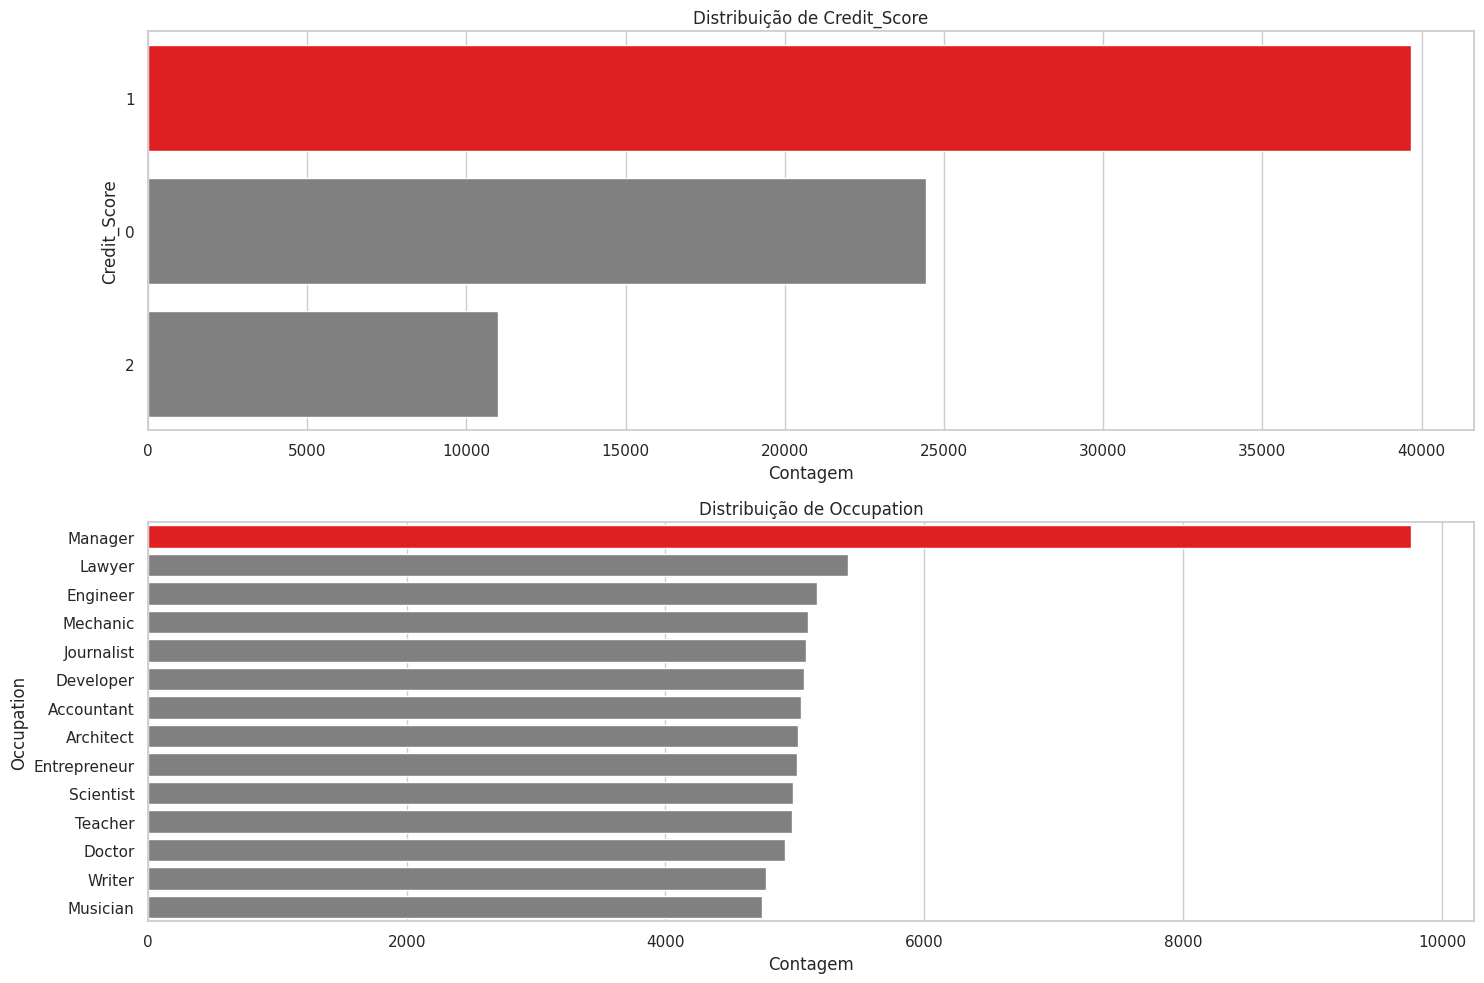

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
idx = data['Credit_Score'].value_counts().index
palette_cs = ['red' if x == idx[0] else 'grey' for x in idx]
sns.countplot(y=data['Credit_Score'], order=idx, palette=palette_cs)
plt.title('Distribuição de Credit_Score')
plt.xlabel('Contagem')
plt.ylabel('Credit_Score')


plt.subplot(2, 1, 2)
idx2 = data['Occupation'].value_counts().index
palette_occ = ['red' if x == idx2[0] else 'grey' for x in idx2]
sns.countplot(y=data['Occupation'], order=idx2, palette=palette_occ)
plt.title('Distribuição de Occupation')
plt.xlabel('Contagem')
plt.ylabel('Occupation')

plt.tight_layout()
plt.show()

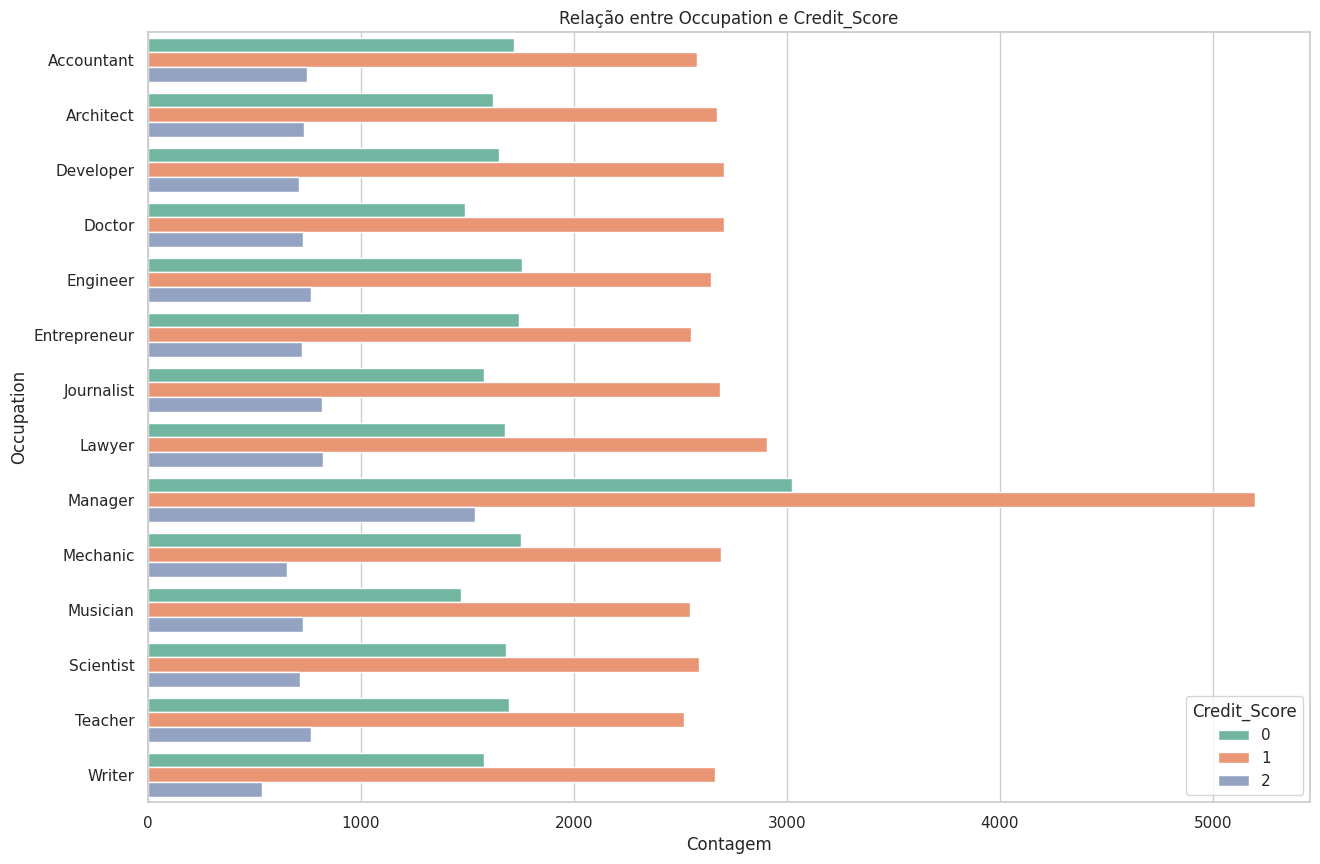

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

counts = data.groupby(['Occupation', 'Credit_Score']).size().reset_index(name='counts')
max_indices = counts.groupby('Occupation')['counts'].idxmax()
palette = sns.color_palette("Set2", n_colors=len(data['Credit_Score'].unique()))

sns.barplot(y='Occupation', x='counts', hue='Credit_Score', data=counts, palette=palette, dodge=True)
plt.title('Relação entre Occupation e Credit_Score')
plt.xlabel('Contagem')
plt.ylabel('Occupation')
plt.legend(title='Credit_Score', loc='lower right')

plt.show()

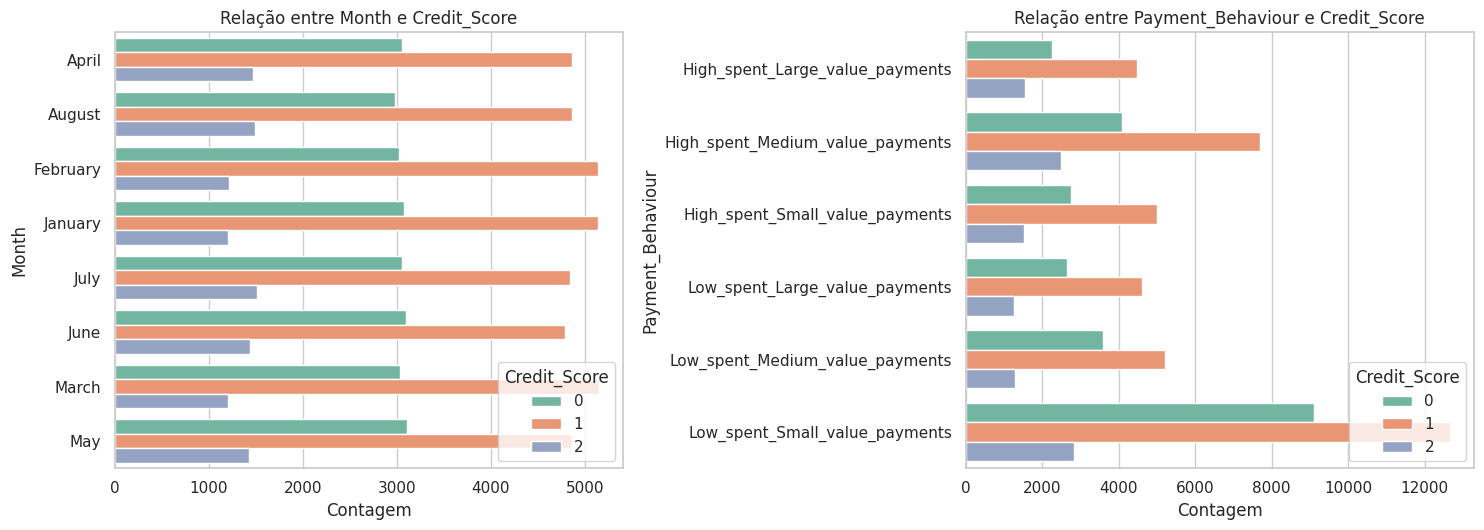

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 3)
counts_month = data.groupby(['Month', 'Credit_Score']).size().reset_index(name='counts')
palette_month = sns.color_palette("Set2", n_colors=len(data['Credit_Score'].unique()))

sns.barplot(y='Month', x='counts', hue='Credit_Score', data=counts_month, palette=palette_month, dodge=True)
plt.title('Relação entre Month e Credit_Score')
plt.xlabel('Contagem')
plt.ylabel('Month')
plt.legend(title='Credit_Score', loc='lower right')

plt.subplot(2, 2, 4)
counts_payment_behaviour = data.groupby(['Payment_Behaviour', 'Credit_Score']).size().reset_index(name='counts')
palette_payment_behaviour = palette_month

sns.barplot(y='Payment_Behaviour', x='counts', hue='Credit_Score', data=counts_payment_behaviour, palette=palette_payment_behaviour, dodge=True)
plt.title('Relação entre Payment_Behaviour e Credit_Score')
plt.xlabel('Contagem')
plt.ylabel('Payment_Behaviour')
plt.legend(title='Credit_Score', loc='lower right')

plt.tight_layout()
plt.show()

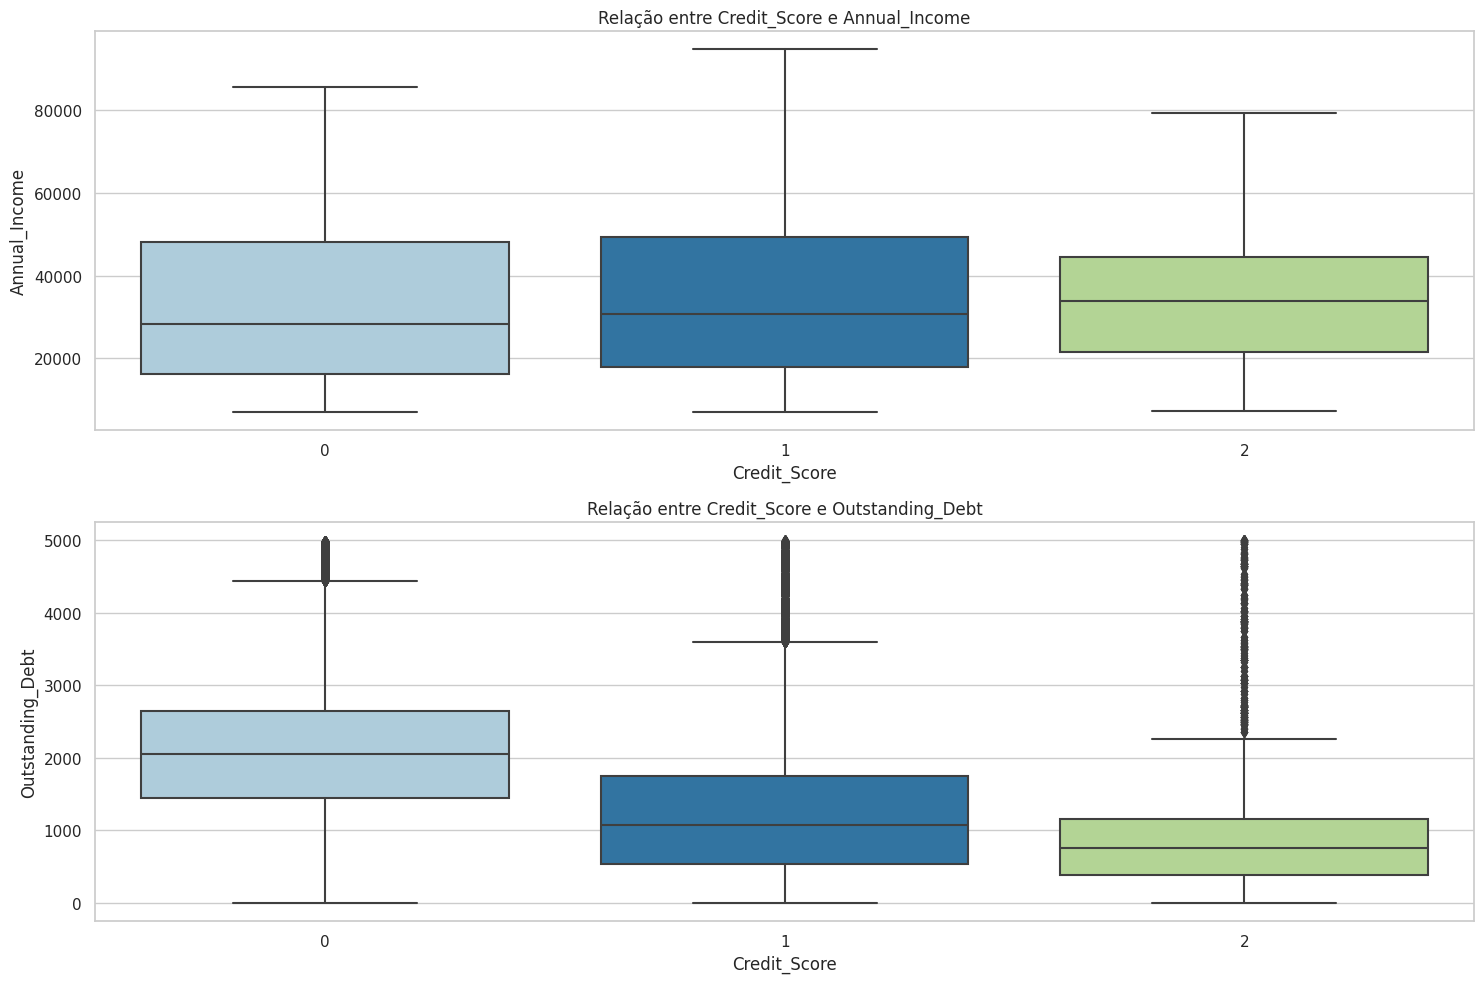

In [15]:
sns.set(style="whitegrid", palette="colorblind")
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.boxplot(x=data['Credit_Score'], y=data['Annual_Income'], showfliers = False, palette=sns.color_palette("Paired"))
plt.title('Relação entre Credit_Score e Annual_Income')
plt.xlabel('Credit_Score')
plt.ylabel('Annual_Income')

plt.subplot(2, 1, 2)
sns.boxplot(x=data['Credit_Score'], y=data['Outstanding_Debt'], palette=sns.color_palette("Paired"))
plt.title('Relação entre Credit_Score e Outstanding_Debt')
plt.xlabel('Credit_Score')
plt.ylabel('Outstanding_Debt')

plt.tight_layout()
plt.show()

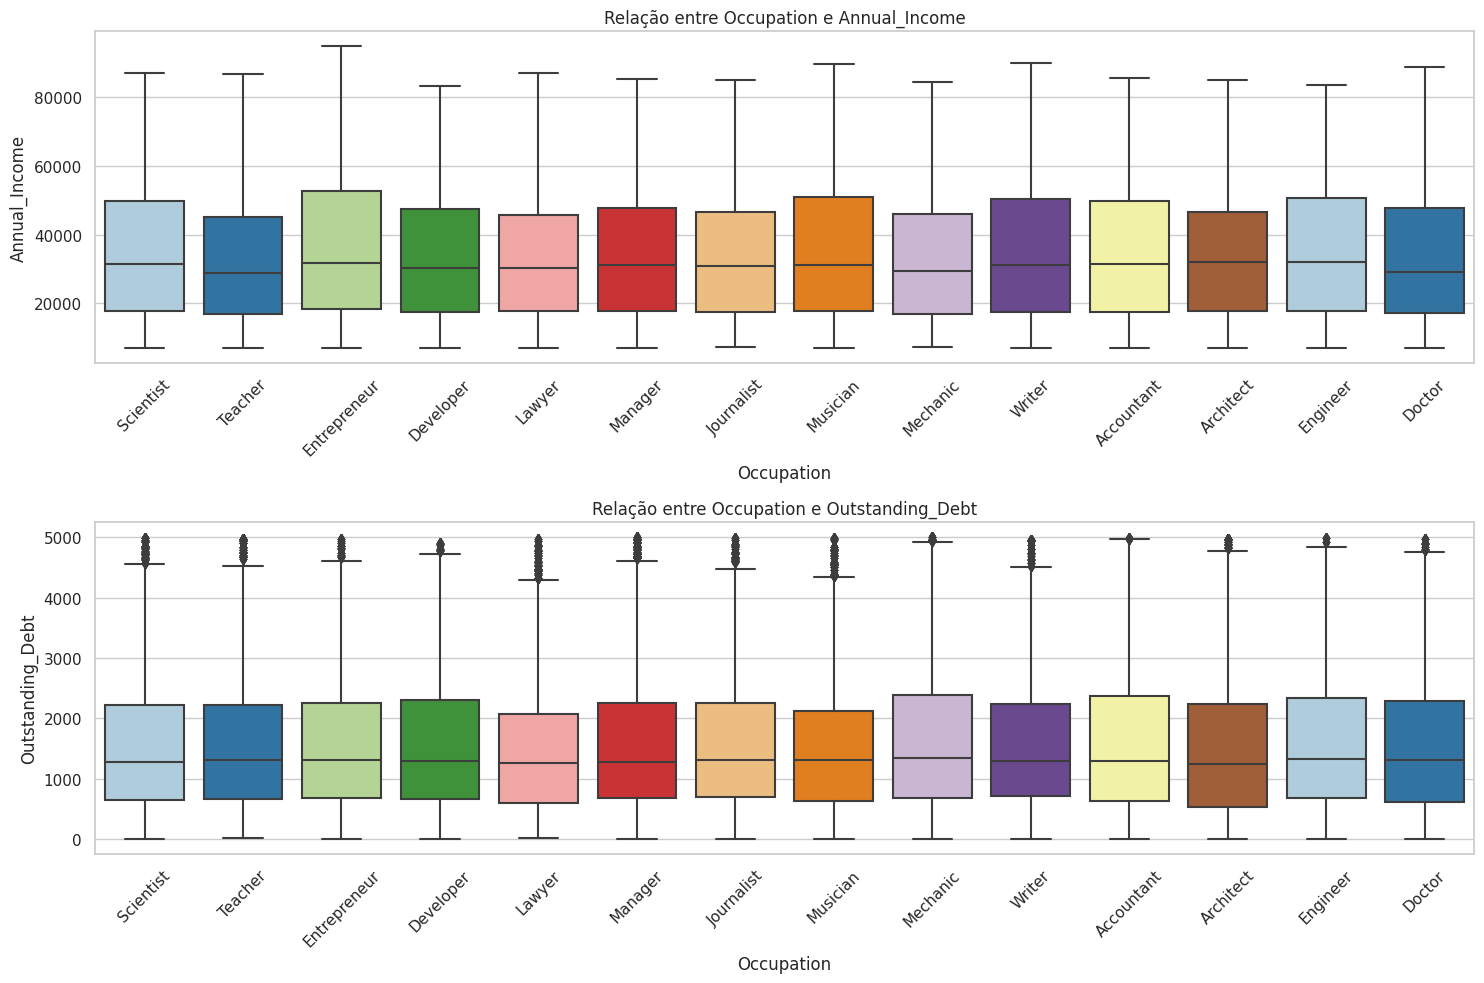

In [16]:
sns.set(style="whitegrid", palette="colorblind")
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
sns.boxplot(x=data['Occupation'], y=data['Annual_Income'], showfliers=False, palette=sns.color_palette("Paired"))
plt.title('Relação entre Occupation e Annual_Income')
plt.xlabel('Occupation')
plt.ylabel('Annual_Income')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
sns.boxplot(x=data['Occupation'], y=data['Outstanding_Debt'], palette=sns.color_palette("Paired"))
plt.title('Relação entre Occupation e Outstanding_Debt')
plt.xlabel('Occupation')
plt.ylabel('Outstanding_Debt')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

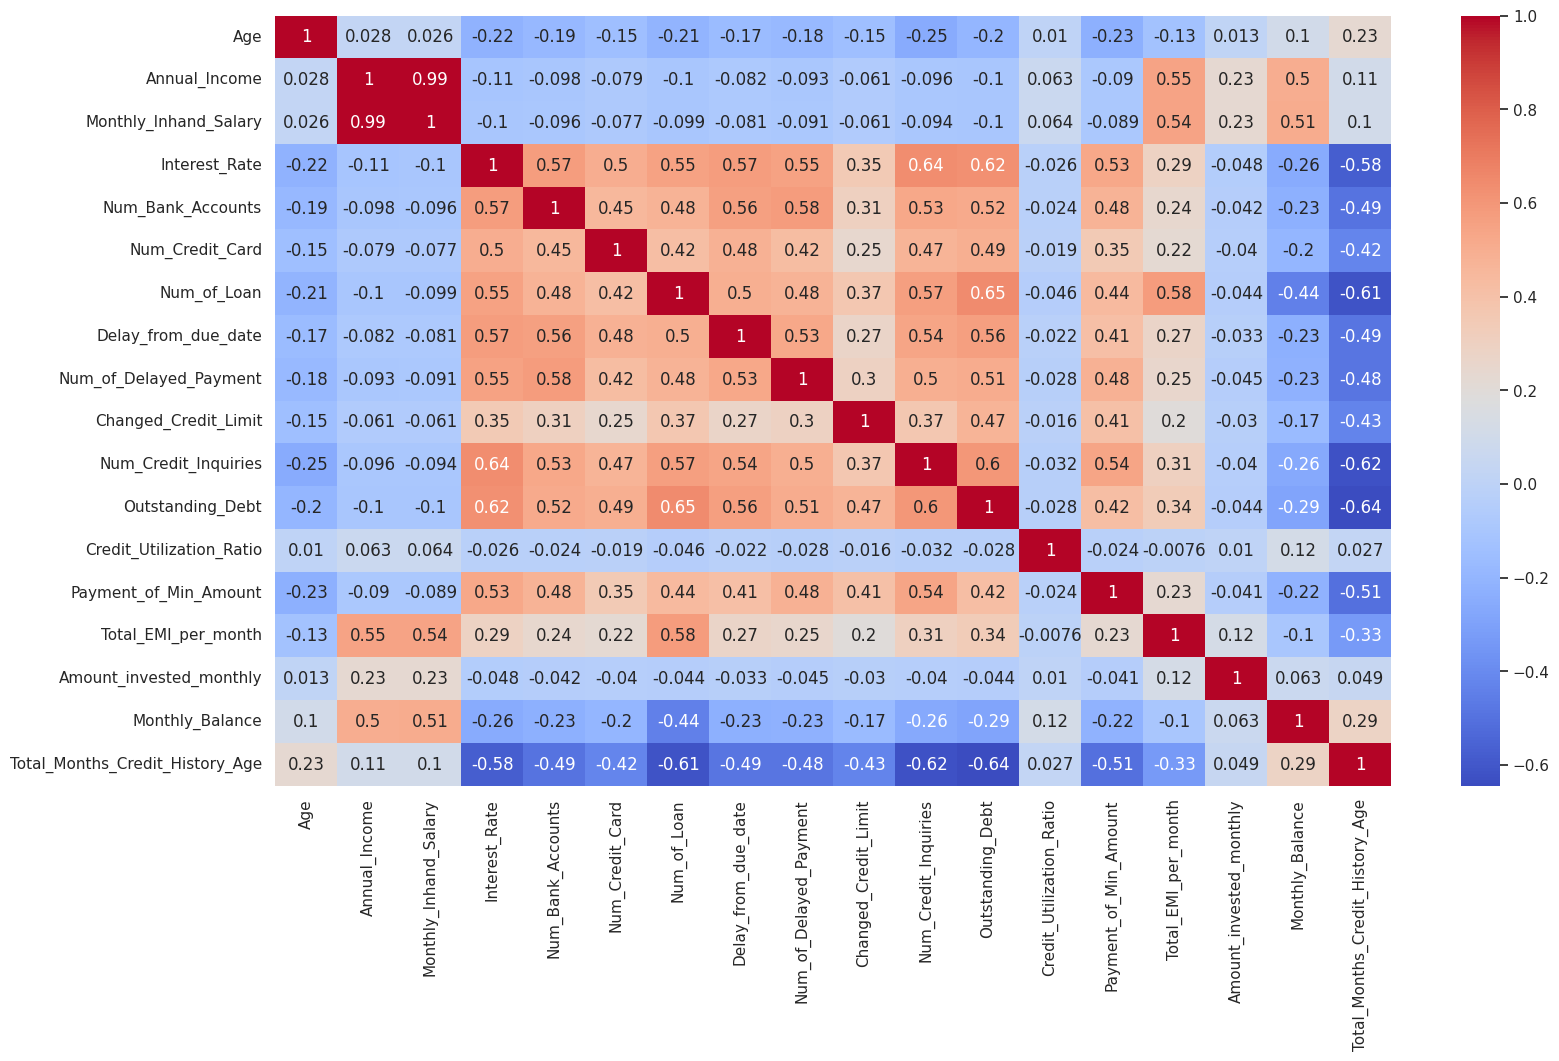

In [17]:
plt.figure(figsize=(18, 10))
sns.heatmap(data[['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Interest_Rate', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Num_of_Loan', 'Delay_from_due_date',
                  'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt',
                  'Credit_Utilization_Ratio', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly',
                  'Monthly_Balance', 'Total_Months_Credit_History_Age']].corr(), annot=True, cmap='coolwarm');

In [18]:
data = etl2.fit_transform(data)
data = pd.DataFrame(data, columns=data.columns)
data.head()

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Total_Months_Credit_History_Age
0,23,1824.84,3,4,3,4.00,3,7,11.27,4.00,809.00,26.82,0,49.57,80.00,High_spent_Small_value_payments,312.00,2,265
1,23,1824.84,3,4,3,4.00,1,6,11.27,4.00,809.00,31.94,0,49.57,118.00,Low_spent_Large_value_payments,284.00,2,266
2,23,1824.84,3,4,3,4.00,3,7,11.27,4.00,809.00,28.61,0,49.57,81.00,Low_spent_Medium_value_payments,331.00,2,267
3,23,1824.84,3,4,3,4.00,5,4,6.27,4.00,809.00,31.38,0,49.57,199.00,Low_spent_Small_value_payments,223.00,2,268
4,23,1824.84,3,4,3,4.00,6,6,11.27,4.00,809.00,24.80,0,49.57,41.00,High_spent_Medium_value_payments,341.00,2,269


In [35]:
from pycaret.classification import *
s = setup(data=data, target='Credit_Score', imputation_type='iterative', categorical_features=['Payment_Behaviour'])

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2369
[LightGBM] [Info] Number of data points in the train set: 52220, number of used features: 17
[LightGBM] [Info] Start training from score 337.592627
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026518 seconds.
You can set `force_c

,Description,Value
0,Session id,3272
1,Target,Credit_Score
2,Target type,Multiclass
3,Original data shape,"(75088, 19)"
4,Transformed data shape,"(75088, 24)"
5,Transformed train set shape,"(52561, 24)"
6,Transformed test set shape,"(22527, 24)"
7,Numeric features,17
8,Categorical features,1
9,Rows with missing values,0.7%


In [20]:
best = compare_models()
evaluate_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8081,0.9007,0.8081,0.8082,0.8075,0.6759,0.6763,19.0330
et,Extra Trees Classifier,0.7985,0.8938,0.7985,0.7983,0.7980,0.6590,0.6593,15.1500
xgboost,Extreme Gradient Boosting,0.7683,0.8778,0.7683,0.7675,0.7675,0.6064,0.6066,8.6160
lightgbm,Light Gradient Boosting Machine,0.7468,0.8630,0.7468,0.7460,0.7459,0.5683,0.5688,13.8590
dt,Decision Tree Classifier,0.7198,0.7578,0.7198,0.7200,0.7199,0.5286,0.5286,6.7800
gbc,Gradient Boosting Classifier,0.7113,0.8371,0.7113,0.7097,0.7077,0.4990,0.5017,54.8990
knn,K Neighbors Classifier,0.6934,0.8150,0.6934,0.6881,0.6885,0.4729,0.4741,8.8240
ada,Ada Boost Classifier,0.6644,0.7235,0.6644,0.6608,0.6584,0.4134,0.4162,8.5440
lda,Linear Discriminant Analysis,0.6556,0.7771,0.6556,0.6528,0.6528,0.4071,0.4085,5.3930
lr,Logistic Regression,0.6425,0.7692,0.6425,0.6373,0.6322,0.3647,0.3708,17.9560


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [37]:
xg = create_model('xgboost')
tune_model(xg, choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7679,0.8752,0.7679,0.7671,0.7672,0.6076,0.6077
1,0.7700,0.8796,0.7700,0.7685,0.7686,0.6073,0.6078
2,0.7591,0.8737,0.7591,0.7585,0.7587,0.5930,0.5930
3,0.7544,0.8672,0.7544,0.7534,0.7531,0.5809,0.5814
4,0.7610,0.8768,0.7610,0.7599,0.7602,0.5939,0.5941
5,0.7698,0.8824,0.7698,0.7689,0.7692,0.6099,0.6100
6,0.7677,0.8848,0.7677,0.7668,0.7668,0.6043,0.6047
7,0.7725,0.8784,0.7725,0.7716,0.7715,0.6128,0.6132
8,0.7705,0.8737,0.7705,0.7694,0.7693,0.6094,0.6098


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7871,0.8927,0.7871,0.7867,0.7867,0.6393,0.6394
1,0.7915,0.9002,0.7915,0.7908,0.7907,0.6450,0.6453
2,0.7877,0.8929,0.7877,0.7873,0.7873,0.6408,0.6409
3,0.7879,0.8904,0.7879,0.7879,0.7873,0.6411,0.6414
4,0.7856,0.8933,0.7856,0.7849,0.7851,0.6369,0.6370
5,0.7991,0.8975,0.7991,0.7989,0.7986,0.6591,0.6594
6,0.8023,0.8991,0.8023,0.8019,0.8019,0.6652,0.6654
7,0.7957,0.8948,0.7957,0.7955,0.7950,0.6544,0.6547
8,0.7831,0.8912,0.7831,0.7826,0.7822,0.6321,0.6325


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [38]:
rf = create_model('rf')
tune_model(rf, choose_better=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8003,0.8973,0.8003,0.8003,0.7996,0.6629,0.6633
1,0.8040,0.9026,0.8040,0.8036,0.8035,0.6685,0.6687
2,0.8044,0.9009,0.8044,0.8043,0.8038,0.6702,0.6706
3,0.8012,0.8947,0.8012,0.8016,0.8007,0.6643,0.6648
4,0.7991,0.8987,0.7991,0.7985,0.7984,0.6602,0.6604
5,0.8116,0.9035,0.8116,0.8116,0.8113,0.6823,0.6825
6,0.8082,0.9029,0.8082,0.8084,0.8076,0.6758,0.6762
7,0.8059,0.9000,0.8059,0.8063,0.8056,0.6727,0.6731
8,0.8040,0.8982,0.8040,0.8043,0.8034,0.6699,0.6705


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6624,0.8136,0.6624,0.6773,0.6386,0.4018,0.4100
1,0.6709,0.8192,0.6709,0.6822,0.6463,0.4138,0.4223
2,0.6575,0.8053,0.6575,0.6724,0.6364,0.3951,0.4026
3,0.6651,0.8102,0.6651,0.6826,0.6437,0.4070,0.4149
4,0.6745,0.8137,0.6745,0.6903,0.6499,0.4205,0.4293
5,0.6728,0.8217,0.6728,0.6841,0.6510,0.4199,0.4277
6,0.6631,0.8185,0.6631,0.6818,0.6401,0.4018,0.4100
7,0.6632,0.8124,0.6632,0.6781,0.6403,0.4031,0.4111
8,0.6699,0.8197,0.6699,0.6854,0.6479,0.4152,0.4232


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=3272, verbose=0, warm_start=False)